- Following this blog for yolo implementation on opencv
- https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/

_Note : uncomment and run the below 2 cells to download the package and weights_ <br>
*Note : need to move the downloaded files, and unzip the `yolo_object_detection.zip` to `./data` dir*

In [1]:
# ! wget https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip

--2021-07-31 21:09:53--  https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2890443 (2.8M) [application/zip]
Saving to: ‘yolo_object_detection.zip’

yolo_object_detecti 100%[===================>]   2.76M  2.19MB/s    in 1.3s    

2021-07-31 21:09:55 (2.19 MB/s) - ‘yolo_object_detection.zip’ saved [2890443/2890443]



In [2]:
# ! wget https://pjreddie.com/media/files/yolov3.weights

--2021-07-31 21:10:04--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.78MB/s    in 39s     

2021-07-31 21:10:52 (6.10 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! ls ./data/

coco.names	yolo_object_detection.py   yolov3.weights
room_ser.jpg	yolo_object_detection.zip
test_image.jpg	yolov3.cfg


In [3]:
# Load Yolo
net = cv2.dnn.readNet("./data/yolov3.weights", "./data/yolov3.cfg")

In [4]:
classes = []
with open("./data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
    
print(classes[:4], len(classes))

['person', 'bicycle', 'car', 'motorbike'] 80


In [5]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [29]:
def infer_and_annotate(img_path):
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_DUPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 0.7, color, 1)
            print(label, x, y, w, h)
    
    return img

In [30]:
ret_img = infer_and_annotate('./test_image.jpg')

tvmonitor 3 61 100 70
person 107 60 118 144
chair 248 64 151 181
laptop 135 129 60 35
bottle 332 154 26 80
book 117 209 58 36
bowl 261 225 63 44
cell phone 134 245 46 34
remote 185 210 26 25


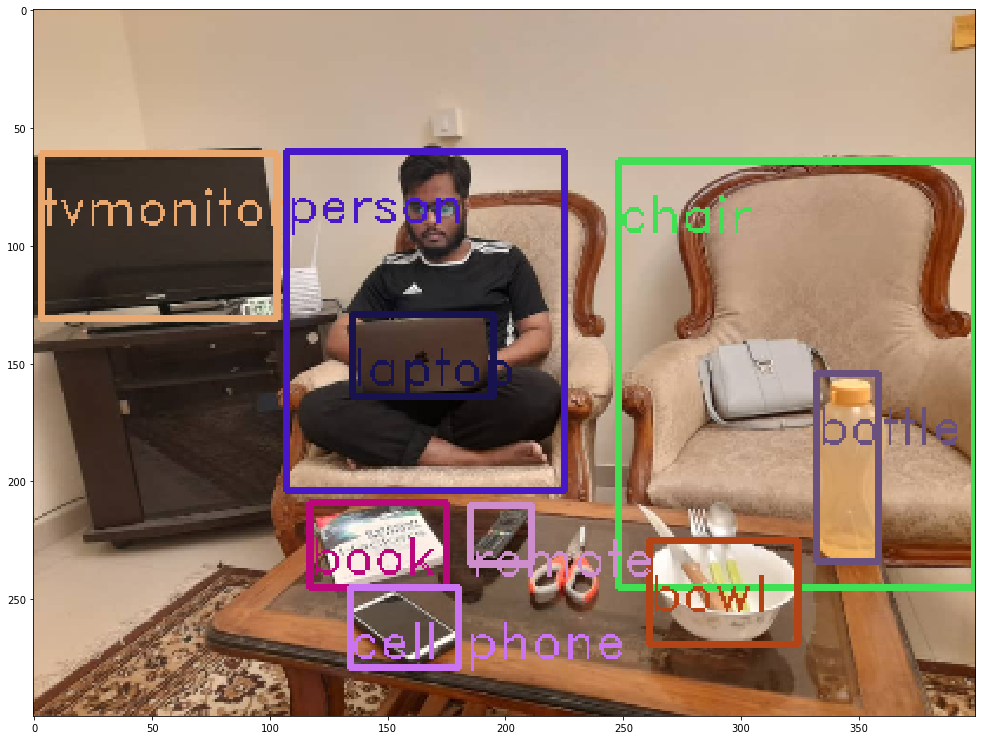

In [31]:
plt.figure(figsize=(17, 13))
plt.imshow(cv2.cvtColor(ret_img, cv2.COLOR_BGR2RGB))